# Objectif 

réaliser une base de donnée de la zone d'interêt avec certain critères

In [70]:
from snappy import ProductIO
from snappy import jpy
from snappy import GPF
from snappy import Mask
import snappy
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import os
import shutil

Définir ou sont placés les images et répértorier toute les images.

In [71]:
images_path = "/home/courtois/jupyter-sentinel"
def list_product(images_path):
    file_list = os.listdir(images_path +"/")
    # definition du chemin d'accès

    images_list = []
    # list contenant tout les noms de fichier 

    for a in file_list:
        if a.endswith(".SEN3"):
            x = images_path+'/'+a
            #print x
            images_list.append(x)  # Dézip
    return images_list

images_list = list_product(images_path)
print len(images_list),'files folders'

100 files folders


Definition de la zone d'interet (ZOI)

In [72]:


footprint = 'POLYGON ((3.6326782572834260 44.2185208139016340, 5.5939417127165860 43.911535651431120,5.1223064651930420 42.401319122180080, 3.2083972577884630 42.7061540583818060,3.6326782572834260 44.2185208139016340))'
# ici les coordonnées de la ZOI

WKTReader =jpy.get_type('com.vividsolutions.jts.io.WKTReader')
geometry = WKTReader().read(footprint) #préparation de la géométrie de la ZOI 

Chargerment des données une par une pour objectif de vérifier les pourcentage de nuage dans la ZOI

/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191104T093329_20191104T093629_20191104T114258_0179_031_364_2160_MAR_O_NR_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


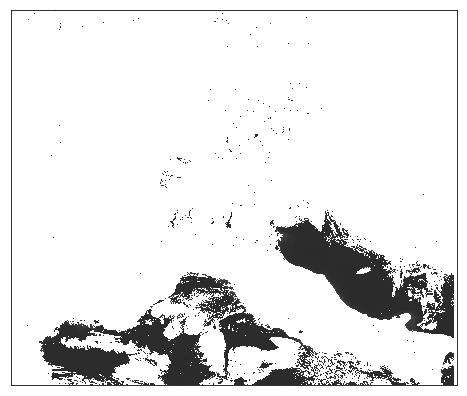

/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20191002T092811_20191002T093111_20191003T174953_0179_050_036_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


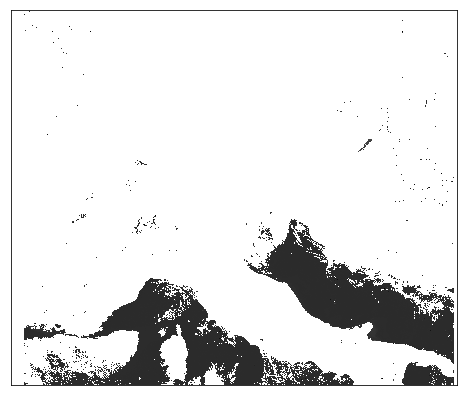

/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20191008T101304_20191008T101604_20191009T190309_0179_050_122_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


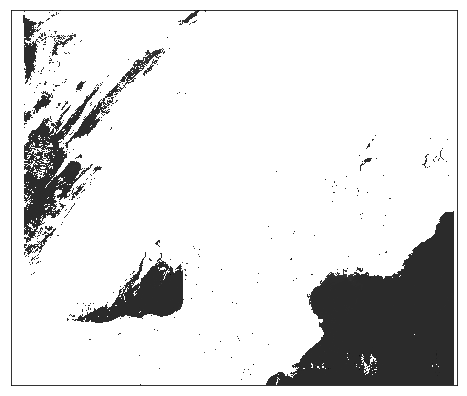

/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20191104T101304_20191104T101604_20191107T161238_0179_051_122_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


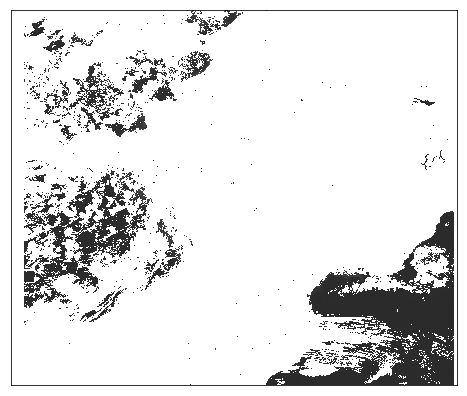

/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191006T102550_20191006T102850_20191007T190005_0179_030_336_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


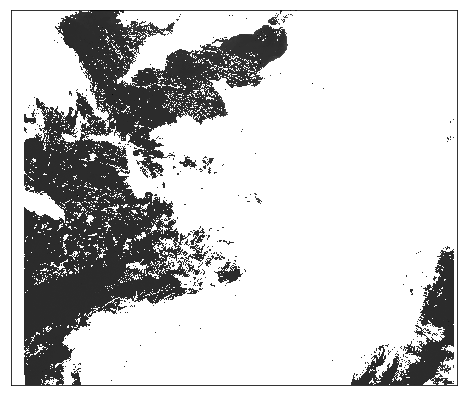

/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191026T100707_20191026T101007_20191027T191130_0179_031_236_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


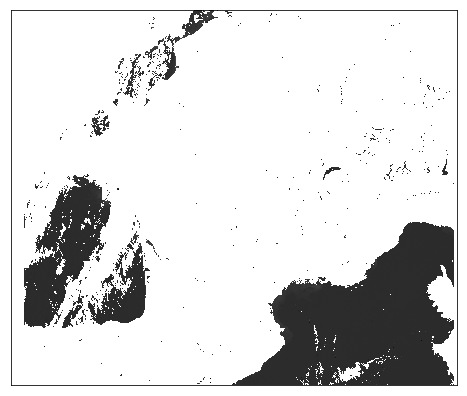

/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191011T095554_20191011T095854_20191012T160935_0179_031_022_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4090


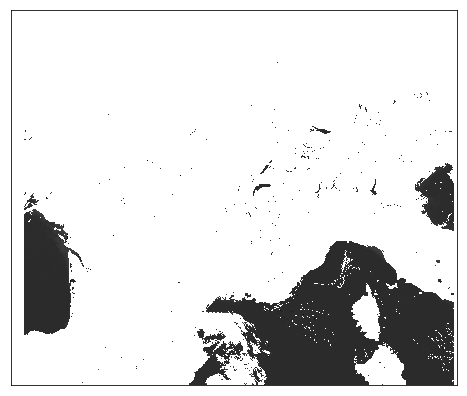

/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191004T093713_20191004T094013_20191005T182445_0179_030_307_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4090


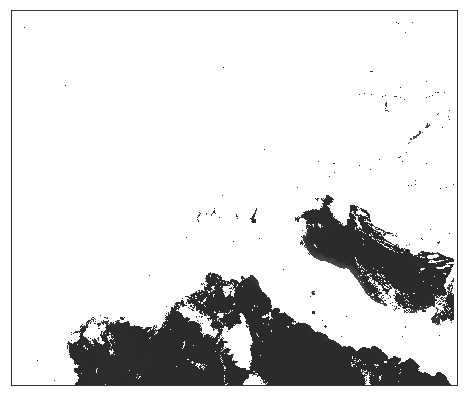

/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20191005T095038_20191005T095338_20191006T180051_0179_050_079_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


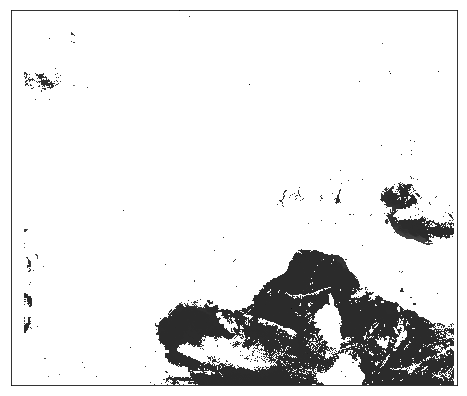

/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20191004T101649_20191004T101949_20191005T174633_0179_050_065_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


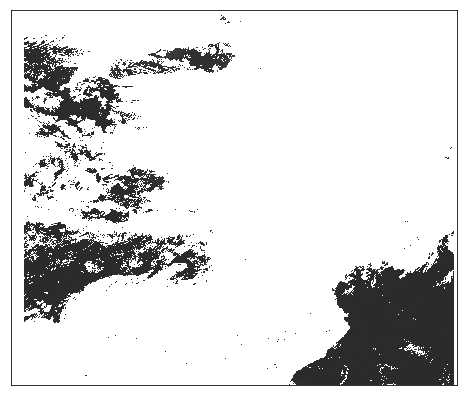

/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191008T093328_20191008T093628_20191009T185026_0179_030_364_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


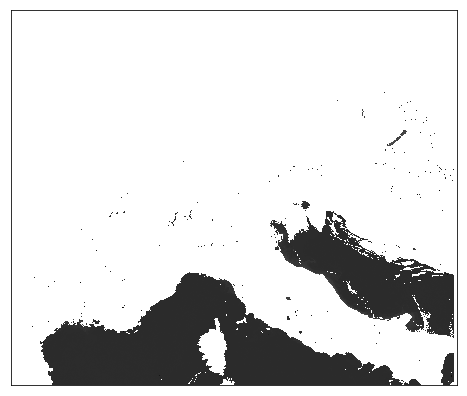

/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20191104T101304_20191104T101604_20191104T121951_0179_051_122_2160_MAR_O_NR_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


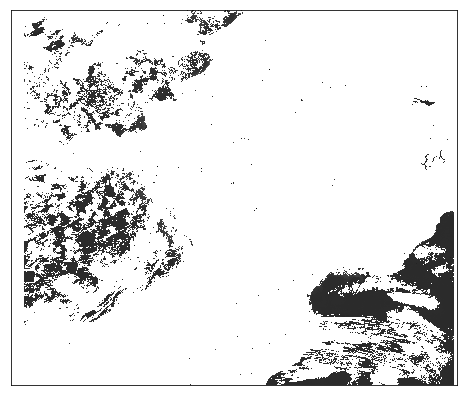

/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20190910T095941_20190910T100241_20190911T191223_0179_029_350_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


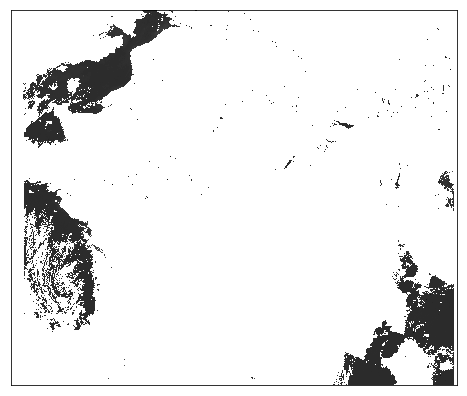

/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20191017T093925_20191017T094225_20191018T171111_0179_050_250_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4090


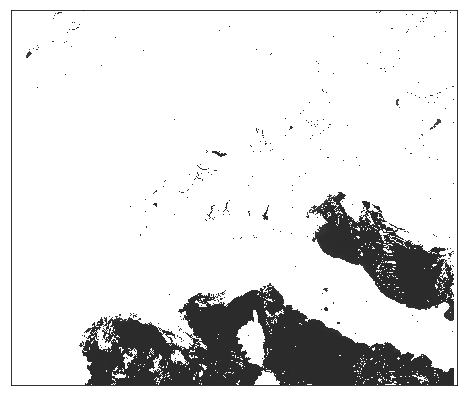

/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191003T100324_20191003T100624_20191004T184101_0180_030_293_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4090


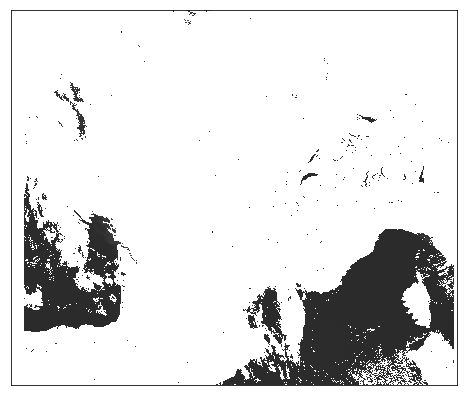

/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191027T094057_20191027T094357_20191028T175546_0179_031_250_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


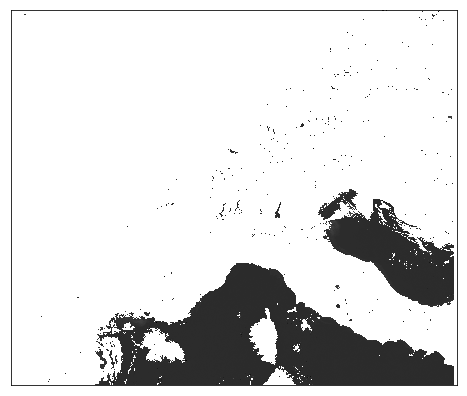

/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20190322T095802_20190322T100102_20190323T184908_0179_042_350_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4090


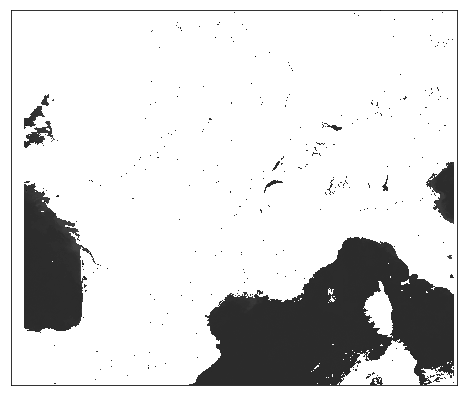

/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191104T093329_20191104T093629_20191123T210032_0179_031_364_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4090


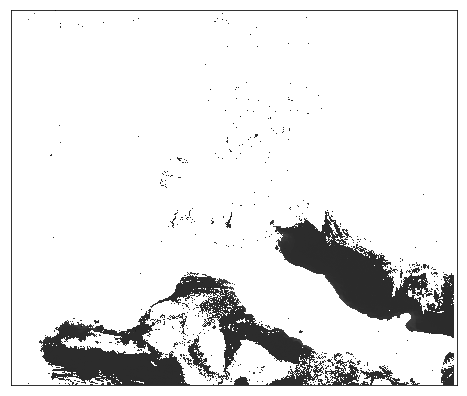

/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191010T102205_20191010T102505_20191011T191956_0180_031_008_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 4865  ; Height: 4091


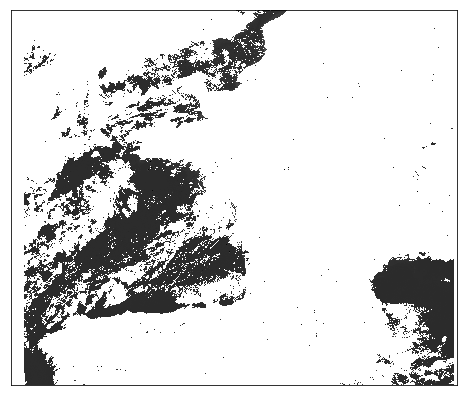

In [4]:
for path_name in images_list:
    
    print(path_name)
    product = ProductIO.readProduct(path_name)
    # Download product
    HashMap = jpy.get_type('java.util.HashMap')  
    parameters = HashMap()

    reflect = product.getBand('Oa06_reflectance')
    # Get the reflecance at band 6
    Width = reflect.getRasterWidth()
    Height = reflect.getRasterHeight()

    print "Image full scale : Width:",Width," ; Height:",Height

    reflect_data = np.zeros(Width*Height, dtype = np.float32)
    reflect.readPixels(0,0,Width,Height,reflect_data)
    reflect_data.shape = Height, Width

    # plot
    plt.figure(figsize=(8, 8))                 # adjusting the figure window size
    fig = plt.imshow(reflect_data, cmap = cm.gray)  #matplotlib settings for the current image
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()
    product.closeIO()

Recentrage de l'image autour de la ZOI

le fonction cubixGeoCut permet de récuperer une image de taille choisit (en pixel) et d'en rendre sa matrice de reflectance.

In [73]:
def cubixGeoCut(point_lon,point_lat,sub_product,band_product,width, height):
    Lon = sub_product.getBand('longitude');
    Lat = sub_product.getBand('latitude');
    # on obtient les matrices de longitude et latitude
    
    band_Width = band_product.getRasterWidth()
    band_Height = band_product.getRasterHeight()
    
    Lon_d = np.zeros(band_Width*band_Height, dtype = np.float32)
    Lon.readPixels(0,0,band_Width,band_Height,Lon_d)
    Lon_d.shape = (band_Height, band_Width) 

    Lat_d = np.zeros(band_Width*band_Height, dtype = np.float32)
    Lat.readPixels(0,0,band_Width,band_Height,Lat_d)
    Lat_d.shape = (band_Height, band_Width) 

    # on chercher le point le plus  proche de la coordonnées souhaitée
    min_lon_mat = abs(Lon_d - point_lon)
    min_lat_mat = abs(Lat_d - point_lat)

    #obtention de l'indice du minimum
    min_coord = np.dstack((min_lon_mat,min_lat_mat))
    min_coord = np.dstack((min_coord,min_coord[:,:,0]+min_coord[:,:,1]))
    minc = np.unravel_index(np.argmin(min_coord[:,:,2], axis=None), min_coord[:,:,0].shape)

    # création de la matrice d'index de taille 125*125
    x=0
    submatidx = np.zeros((height*width,2),dtype=int)

    for i in range(minc[0],minc[0]+height):
        for j in range(minc[1],minc[1]+width):
            submatidx[x] = (i,j)
            x = x+1
    return submatidx

L'objectif ici est de réaliser un protocole permetant d'obtenir une matrice de reflectance de taille h&w choisie et de profondeur 16 pour les 16 bandes d'une images.

In [110]:
path_name = images_list[0]
#print(path_name)

#lecture du produit
product = ProductIO.readProduct(path_name)

HashMap = jpy.get_type('java.util.HashMap')  
parameters = HashMap()

#generation d'un sous produit autour de la zoi
SubsetOp = jpy.get_type('org.esa.snap.core.gpf.common.SubsetOp')
op = SubsetOp()
op.setSourceProduct(product)

WKTReader =jpy.get_type('com.vividsolutions.jts.io.WKTReader')
geometry = WKTReader().read(footprint) #préparation de la géométrie de la ZOI 

op.setGeoRegion(geometry)
sub_product = op.getTargetProduct()

#affichage debbug des noms de bandes
#reflect_bands = sub_product.getBandNames()
#print(reflect_bands,list(reflect_bands))

def Reflectance_band_names():
    reflect_band_names = []
    #recupréation du nom des bandes interssantes
    for i in range(1,10):
        reflect_band_names.append(str('Oa0'+str(i)+'_reflectance'))
    reflect_band_names.append(str('Oa10_reflectance'))
    reflect_band_names.append(str('Oa11_reflectance'))
    reflect_band_names.append(str('Oa12_reflectance'))
    reflect_band_names.append(str('Oa16_reflectance'))
    reflect_band_names.append(str('Oa17_reflectance'))
    reflect_band_names.append(str('Oa18_reflectance'))
    reflect_band_names.append(str('Oa21_reflectance'))
    #print(reflect_band_names)
    return reflect_band_names
reflect_band_names = Reflectance_band_names()

In [128]:
def date_finder(name,tag):
    # recupération de l'index du debut de la date dans le nom ex : ...WFR____20191026T100707...
    date_index = s.find(tag)+len(tag)
    # extraction de la date : 20191026
    date_str = s[date_index:date_index+8]
    # mise en forme jour, mois, années : ['26', '10', '2019']
    date = [date_str,date_str[6:8],date_str[4:6],date_str[0:4]]
    return date
    

/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20191008T101304_20191008T101604_20191009T190309_0179_050_122_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 623  ; Height: 607
(607, 623)  shape Lon
cloud/land coverage: 3 %


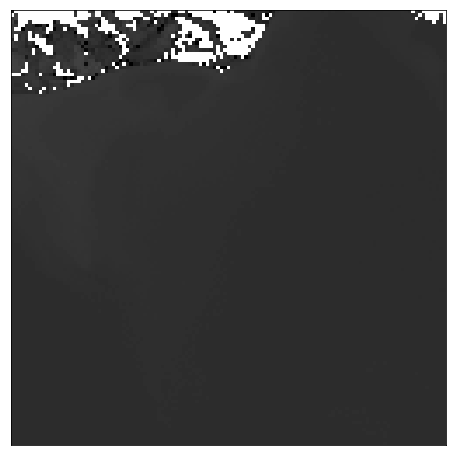

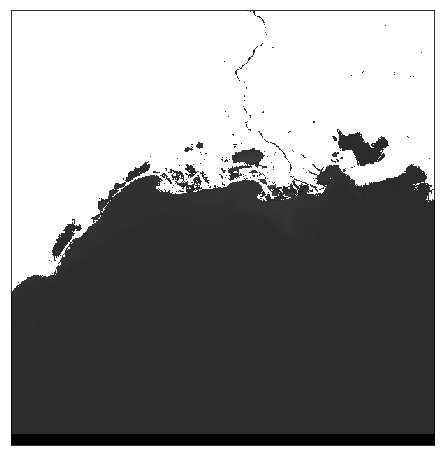

--- 1.87963604927 seconds Processing done ---
1 / 17
/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191106T102207_20191106T102507_20191106T122957_0179_032_008_2160_MAR_O_NR_002.SEN3
Image full scale : Width: 640  ; Height: 620
(620, 640)  shape Lon
cloud/land coverage: 5 %
--- 1.02739691734 seconds Processing done ---
2 / 17
/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191026T100707_20191026T101007_20191027T191130_0179_031_236_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 613  ; Height: 600
(600, 613)  shape Lon
cloud/land coverage: 3 %
--- 1.22314286232 seconds Processing done ---
3 / 17
/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191011T095554_20191011T095854_20191012T160935_0179_031_022_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 600  ; Height: 591
(591, 600)  shape Lon
cloud/land coverage: 3 %
--- 1.74419999123 seconds Processing done ---
4 / 17
/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20191112T100534_20191112T100834_20191112T121409_0179_051_236_2160_MA

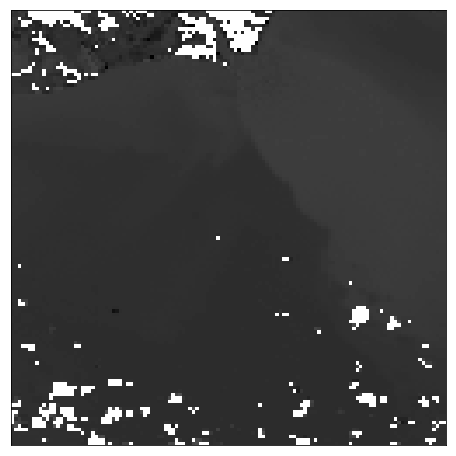

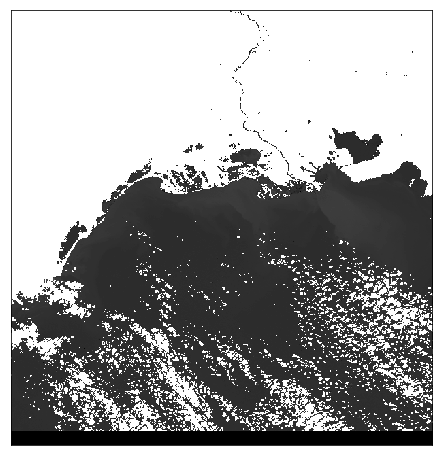

--- 1.2632060051 seconds Processing done ---
12 / 17
/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191027T094057_20191027T094357_20191028T175546_0179_031_250_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 627  ; Height: 619
(619, 627)  shape Lon
cloud/land coverage: 4 %
--- 1.23279976845 seconds Processing done ---
13 / 17
/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191030T100324_20191030T100624_20191112T183134_0179_031_293_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 606  ; Height: 595
(595, 606)  shape Lon
cloud/land coverage: 3 %


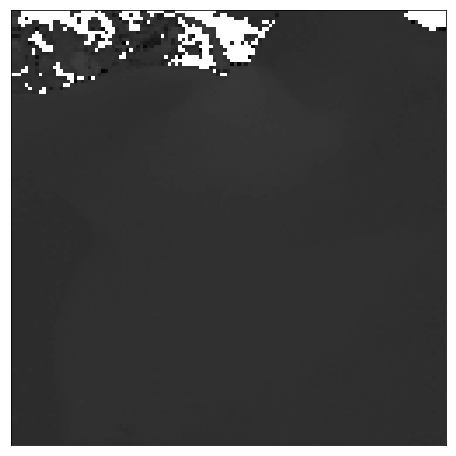

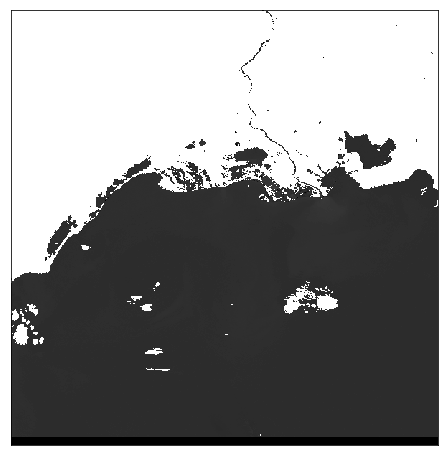

--- 1.38840198517 seconds Processing done ---
14 / 17
/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20191112T100534_20191112T100834_20191129T025253_0179_051_236_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 610  ; Height: 598
(598, 610)  shape Lon
cloud/land coverage: 3 %


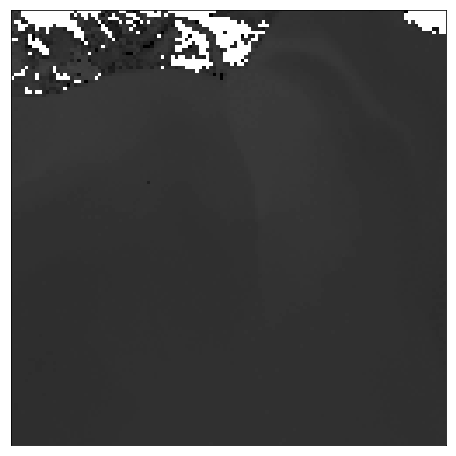

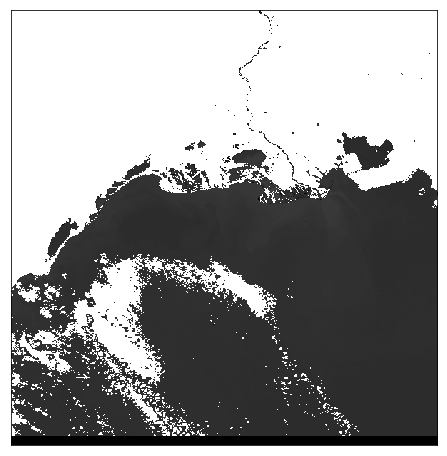

--- 1.34991788864 seconds Processing done ---
15 / 17
/home/courtois/jupyter-sentinel/S3A_OL_2_WFR____20191027T102033_20191027T102333_20191028T190412_0179_051_008_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 636  ; Height: 618
(618, 636)  shape Lon
cloud/land coverage: 5 %
--- 1.10715699196 seconds Processing done ---
16 / 17
/home/courtois/jupyter-sentinel/S3B_OL_2_WFR____20191010T102205_20191010T102505_20191011T191956_0180_031_008_2160_MAR_O_NT_002.SEN3
Image full scale : Width: 640  ; Height: 620
(620, 640)  shape Lon
cloud/land coverage: 3 %
--- 0.922742128372 seconds Processing done ---
17 / 17


In [141]:
# liste de toutes les images filtrée et recadrée
imageData = []
images_list = list_product(images_path)
prog = 1
for path_name in images_list:
#    path_name = images_list[0]
    print(path_name)
    
    # chargement du product
    product = ProductIO.readProduct(path_name)
    
    HashMap = jpy.get_type('java.util.HashMap')  
    parameters = HashMap()

    # generation d'un sous produit autour de la zoi
    op = SubsetOp()
    op.setSourceProduct(product)
    op.setGeoRegion(geometry)
    sub_product = op.getTargetProduct()
    
    #reflect_band = sub_product.getBand('Oa06_reflectance')
    # Obtention d'une liste des bandes 
    reflect_band_data = []
    timesaver = True
    for name in reflect_band_names:
        
        start_time = time.time()
        
        reflect_band_data.append(sub_product.getBand(name)) 
        if (timesaver):
            # Récupération de la tailles des bandes
            Width = reflect_band_data[0].getRasterWidth()
            Height = reflect_band_data[0].getRasterHeight()
            print "Image full scale : Width:",Width," ; Height:",Height
            if not(Width>500 and Height>500):
                
                print("--- %s seconds size break---" % (time.time() - start_time))
                break
            else:
                timesaver = False
    #print(reflect_band_data)
    
    
    
    # outils de filtrage :
    # on filtre si : la taille ne correspond pas OU si la couerture T/C est > 10 %
    remove = True
    
    # test de taille minimum pour l'image
    if (Width>500 and Height>500):
        # extraire les données de reflectances de toutes les bandes dans une matrice
        # definition des paramètres codant la découpe de l'image dans la ZOI
        point_lon = 4.654875873875496 
        point_lat = 43.41241369162426
        height_reduit = 125
        width_reduit = 125
        
        # matrice de donnée
        # IL FAUDRA surement verifier les index pour ne pas depasser les capacitée de la matrice ######################
        #print "len(reflect_band_data)",len(reflect_band_data)
        data_reflect = np.empty([len(reflect_band_data), width_reduit, height_reduit ])
        # etablissement de la list d'indice qui permetera de reduire la matrice d'image de la ZOI
        submatidx = cubixGeoCut(point_lon,point_lat,sub_product,reflect_band_data[0],width_reduit, height_reduit )
        #print("submatidx",submatidx)
        
        multiSpectralMatrixTmp = []
        for i in range(0,len(reflect_band_data)):
            
            # extraction des données 
            reflect_data = np.zeros(Width*Height, dtype = np.float32)
            reflect_band_data[i].readPixels(0,0,Height,Width,reflect_data)
            reflect_data.shape = Width, Height
            
            # reduction de la donnée dans la zone definit
            data_reflect[i] = reflect_data[submatidx[:,0],submatidx[:,1]].reshape(height_reduit,width_reduit)
            
            # afficher la coverture terrestre et nuageuse
            c=0
            for j in range(0,data_reflect[i].shape[0]):
                for k in range(0,data_reflect[i].shape[1]):
                    if (data_reflect[i][j,k] > 1):
                        c = c+1
            c = (c*100)/(data_reflect[i].shape[0]*data_reflect[i].shape[1])
            if (i == 0) : print "cloud/land coverage:",c,"%"
            
            if (c<=5):
                # ici on est dans la condition couverture L/C <= 5% ET taille de l'image de base convenable
                remove = False
                multiSpectralMatrixTmp.append(data_reflect[i])
            else:
                i = len(reflect_band_data)+1
                print("--- %s seconds reading band break ---" % (time.time() - start_time))
                break
        
            # plot et subplot 
            if (i==4 and not(remove) and np.random.rand()>0.8):
                
                # plot
                plt.figure(figsize=(8, 8))                 # adjusting the figure window size
                fig = plt.imshow(data_reflect[i], cmap = cm.gray)  #matplotlib settings for the current image
                fig.axes.get_xaxis().set_visible(False)
                fig.axes.get_yaxis().set_visible(False)
                plt.show()
                # plot
                plt.figure(figsize=(8, 8))                 # adjusting the figure window size
                fig = plt.imshow(reflect_data, cmap = cm.gray)  #matplotlib settings for the current image
                fig.axes.get_xaxis().set_visible(False)
                fig.axes.get_yaxis().set_visible(False)
                plt.show()
                
    product.closeIO() 
    # si l'image n'as pas passée les conditions ou si elle ne possèdent pas ses 16 bandes exploitable on la supprime
    if remove or (len(multiSpectralMatrixTmp)!=16):
        print('removed')
        shutil.rmtree(path_name)
    else :
        # ajout de la date en fin de list
        date = date_finder(path_name,'WFR____')
        multiSpectralMatrixTmp.append(date)
        imageData.append(multiSpectralMatrixTmp)
        print("--- %s seconds Processing done ---" % (time.time() - start_time))
    print prog,"/",len(images_list)
    prog +=1
    

In [142]:
images_list = list_product(images_path)
print len(images_list),'Files'

#print len(imageData)
print len(imageData[0])
print imageData[0][16]
print imageData[1][16]
print imageData[2][16]
print imageData[3][16]
print imageData[4][16]
print imageData[5][16]
print imageData[6][16]
print imageData[7][16]

17 Files
17
['20191026', '26', '10', '2019']
['20191026', '26', '10', '2019']
['20191026', '26', '10', '2019']
['20191026', '26', '10', '2019']
['20191026', '26', '10', '2019']
['20191026', '26', '10', '2019']
['20191026', '26', '10', '2019']
['20191026', '26', '10', '2019']


In [ ]:
#list(sub_product.getBandNames())
# 4.684875873875496 43.41241369162426
Lon = sub_product.getBand('longitude');
Lat = sub_product.getBand('latitude');
# on obtient les matrices de longitude et latitude

Lon_d = np.zeros(Width*Height, dtype = np.float32)
Lon.readPixels(0,0,Width,Height,Lon_d)
Lon_d.shape = Height, Width

Lat_d = np.zeros(Width*Height, dtype = np.float32)
Lat.readPixels(0,0,Width,Height,Lat_d)
Lat_d.shape = Height, Width

# on chercher le point le plus  proche de la coordonnées souhaitée
min_lon_mat = abs(Lon_d - 4.684875873875496)
min_lat_mat = abs(Lat_d - 43.41241369162426)

#obtention de l'indice du minimum
min_coord = np.dstack((min_lon_mat,min_lat_mat))
min_coord = np.dstack((min_coord,min_coord[:,:,0]+min_coord[:,:,1]))
minc = np.unravel_index(np.argmin(min_coord[:,:,2], axis=None), min_coord[:,:,0].shape)

# création de la matrice d'index de taille 125*125
x=0
submatidx = np.zeros((125*125,2),dtype=int)

for i in range(minc[0],minc[0]+125):
    for j in range(minc[1],minc[1]+125):
        submatidx[x] = (i,j)
        x = x+1
        
print (submatidx[:,1], 125*125)
print( reflect_data[submatidx[:,0],submatidx[:,1]].reshape(125,125))


submatrixreflect = reflect_data[submatidx[:,0],submatidx[:,1]].reshape(125,125)
# plot
plt.figure(figsize=(8, 8))                 # adjusting the figure window size
fig = plt.imshow(submatrixreflect, cmap = cm.gray)  #matplotlib settings for the current image
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#list(sub_product.getAllFlagNames())

In [ ]:
# Reflectance test
Cloud_band = sub_product.getBand('Oa06_reflectance')
print Cloud_band.getProduct()

Width = Cloud_band.getRasterWidth()
Height = Cloud_band.getRasterHeight()
print "Image full scale : Width:",Width," ; Height:",Height
Cloud_data = np.zeros(Width*Height, dtype = np.float32)
Cloud_band.readPixels(0,0,Width,Height,Cloud_data)
Cloud_data.shape = Height, Width
print Cloud_data


In [ ]:
plt.figure(figsize=(8, 8))                 # adjusting the figure window size
fig = plt.imshow(Cloud_data, cmap = cm.gray)  #matplotlib settings for the current image
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
mask_group = product.getMaskGroup()
print(list(mask_group.getNodeNames()))
mymask = mask_group.get('WQSF_lsb_CLOUD')

h = sub_product.getSceneRasterHeight()
w = sub_product.getSceneRasterWidth()

data = np.zeros(w * h, np.uint32)

my_real_mask = jpy.cast(mymask, snappy.Mask)

my_real_mask.readPixels(0,0,w,h, data)

data.shape = h, w 

In [ ]:
for path_name in images_list:
    # path_name = images_list[0]
    print(path_name)
    product = ProductIO.readProduct(path_name)
    # Download product
    HashMap = jpy.get_type('java.util.HashMap')  
    parameters = HashMap()
    
    #generating the sub product auround the zoi
    op = SubsetOp()
    op.setSourceProduct(product)
    op.setGeoRegion(geometry)
    sub_product = op.getTargetProduct()
    
    Cloud_band = sub_product.getMaskGroup().get('CLOUD')
    # Get the reflecance at band 6
    Width = Cloud_band.getRasterWidth()
    Height = Cloud_band.getRasterHeight()
    
    print "Image full scale : Width:",Width," ; Height:",Height
    
    Cloud_data = np.zeros(Width*Height, dtype = np.float32)
    Cloud_band.readPixels(0,0,Width,Height,Cloud_data)
    Cloud_data.shape = Height, Width
    
    # plot
    plt.figure(figsize=(8, 8))                 # adjusting the figure window size
    fig = plt.imshow(Cloud_data, cmap = cm.gray)  #matplotlib settings for the current image
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()